In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [218]:
data = pd.read_csv('liver.csv')

In [219]:
data.shape

(583, 11)

In [220]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [222]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [223]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [224]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [225]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

<AxesSubplot: xlabel='Dataset', ylabel='count'>

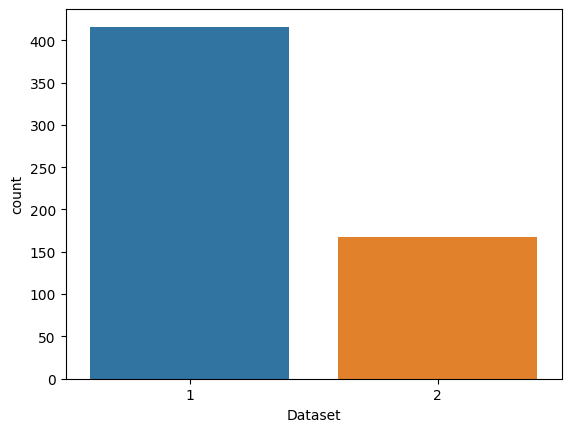

In [226]:
import seaborn as sns
sns.countplot(x=data['Dataset'])

Here 2 means suffering with disease and 1 means not suffering with disease.

Replacing 2 with 1 and 1 with 0, for better understanding.

In [227]:
data['Dataset'] = data['Dataset'].replace([2,1],[1,0])
data['Dataset'].head()

0    0
1    0
2    0
3    0
4    0
Name: Dataset, dtype: int64

<AxesSubplot: xlabel='Dataset', ylabel='count'>

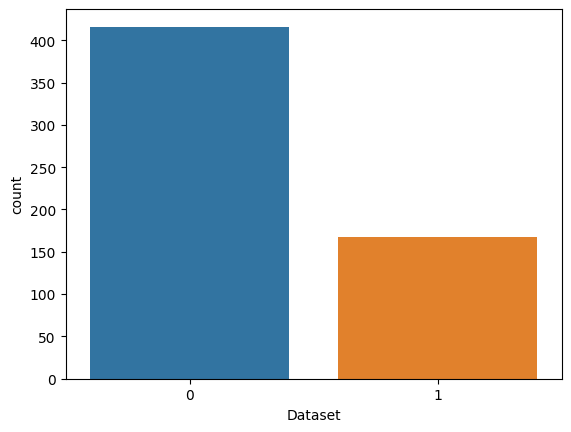

In [228]:
import seaborn as sns
sns.countplot(x=data['Dataset'])

<AxesSubplot: xlabel='Gender', ylabel='count'>

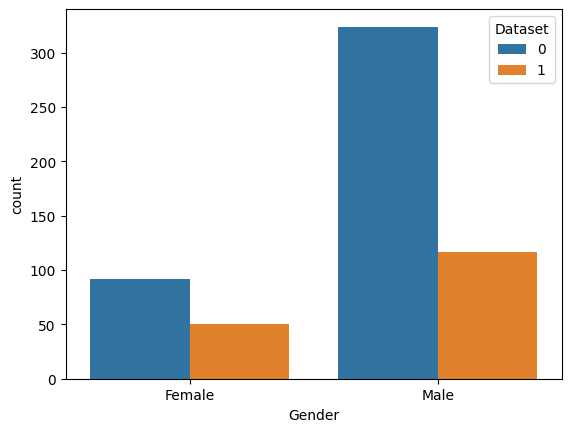

In [229]:
sns.countplot(x=data['Gender'], data = data, hue = data['Dataset'])

In [230]:
data = pd.get_dummies(data, columns = ['Gender'], drop_first = True)

In [231]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


<AxesSubplot: >

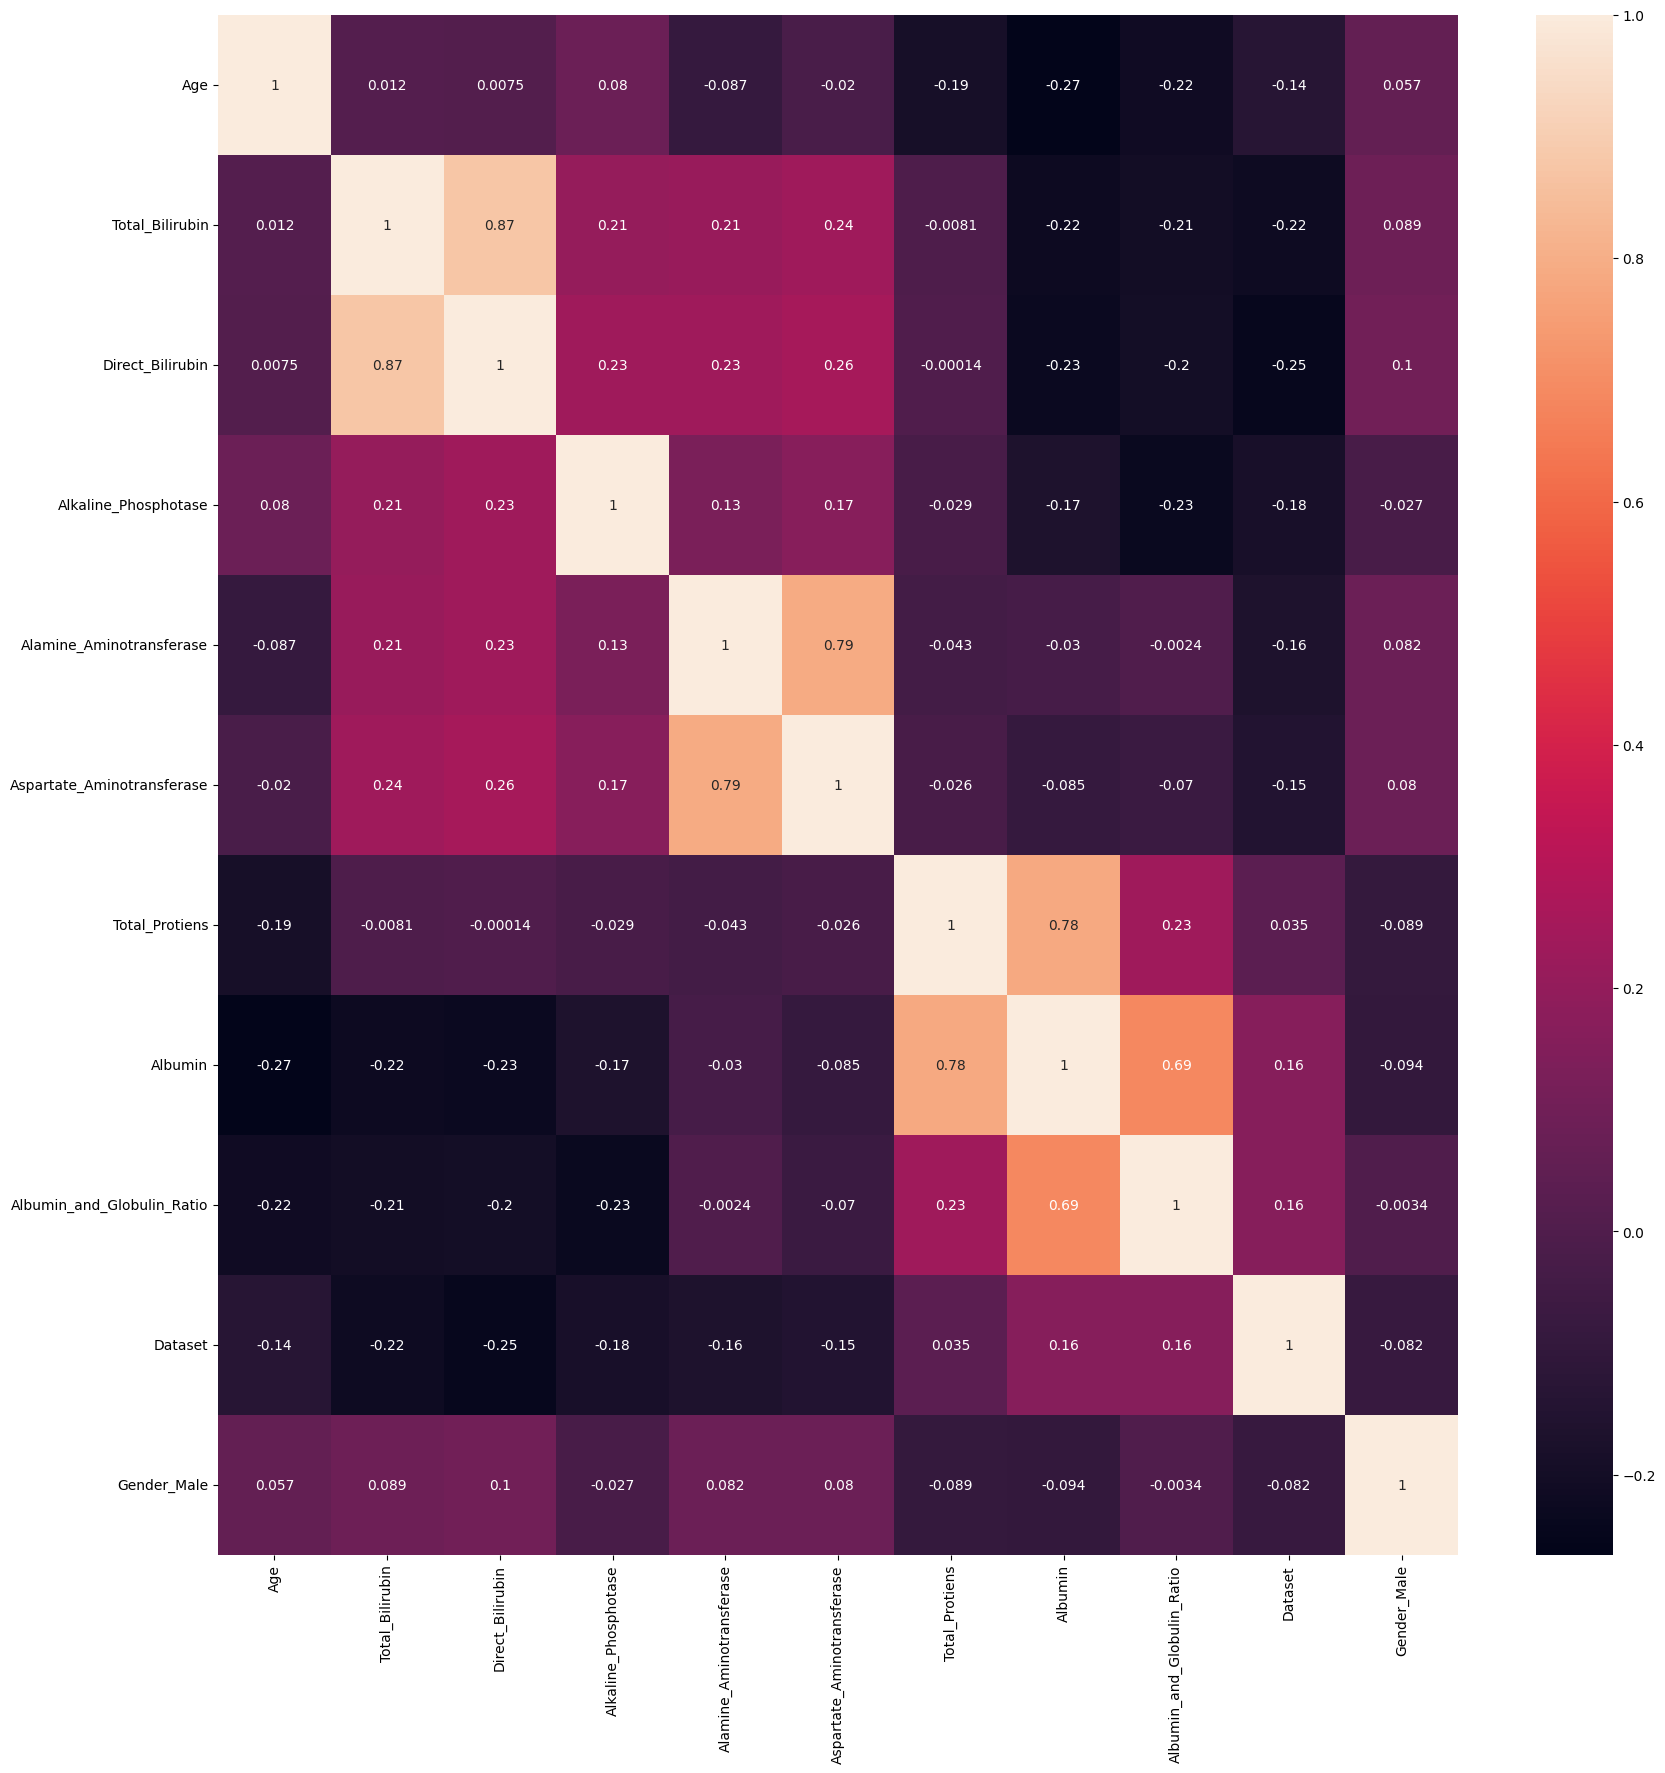

In [232]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True)

In [233]:
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351,0.056560
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208,0.089291
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046,0.100436
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866,-0.027496
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416,0.082332
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934,0.080336
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008,-0.089121
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388,-0.093799
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319,-0.003404
Dataset,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.162319,1.000000,-0.082416


In [234]:
# data.drop(['Total_Protiens','Gender_Male'],axis=1,inplace=True)

In [235]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,0,1


In [236]:
# X = data[['Albumin_and_Globulin_Ratio', 'Albumin', 'Total_Protiens', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Age']]
X = data.drop('Dataset', axis = 1)
y = data['Dataset']

In [237]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio',
       'Gender_Male'],
      dtype='object')

In [238]:
# from imblearn.combine import SMOTETomek
# smk = SMOTETomek(random_state = 42)
# X, y = smk.fit_sample(X,y)
# X.shape, y.shape

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [241]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (524, 10) (524,)
Test Set:  (59, 10) (59,)


In [242]:
X_test

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
355,19,1.4,0.8,178,13,26,8.0,4.6,1.300000,1
407,12,1.0,0.2,719,157,108,7.2,3.7,1.000000,1
90,60,5.7,2.8,214,412,850,7.3,3.2,0.780000,1
402,42,0.5,0.1,162,155,108,8.1,4.0,0.900000,0
268,40,14.5,6.4,358,50,75,5.7,2.1,0.500000,1
356,33,0.7,0.2,256,21,30,8.5,3.9,0.800000,1
110,24,0.7,0.2,188,11,10,5.5,2.3,0.710000,0
488,60,0.7,0.2,171,31,26,7.0,3.5,1.000000,1
132,18,0.8,0.2,199,34,31,6.5,3.5,1.160000,0
497,67,2.2,1.1,198,42,39,7.2,3.0,0.700000,1


In [243]:
y_test

355    1
407    0
90     0
402    0
268    0
356    0
110    1
488    1
132    1
497    0
541    1
70     0
281    1
184    0
420    0
412    0
296    0
104    0
571    0
181    0
278    0
208    0
2      0
554    0
338    0
63     0
55     0
578    1
350    0
29     1
155    0
422    0
83     0
247    0
82     1
318    0
261    0
244    0
451    0
546    0
361    1
209    0
176    0
10     0
424    0
211    0
6      0
486    0
495    1
259    0
101    1
165    0
72     0
177    0
196    0
227    0
545    1
440    0
489    1
Name: Dataset, dtype: int64

RANDOM FOREST ALGORITHM


In [244]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120)

In [245]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [246]:
rf_acc_score=round(accuracy_score(y_test, rf.predict(X_test))*100,2)
rf_acc_score

81.36

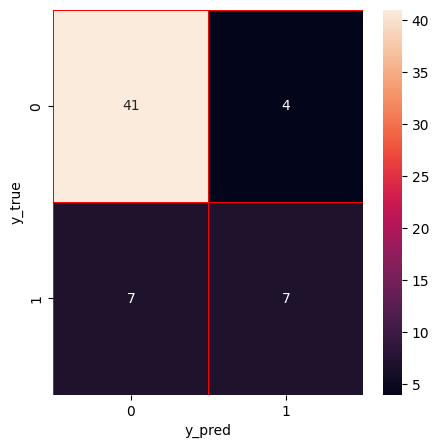

In [247]:
cm=confusion_matrix(y_test, rf.predict(X_test))
#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [248]:
from sklearn.metrics import classification_report
report = classification_report(y_test,rf.predict(X_test) )
print(report)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        45
           1       0.64      0.50      0.56        14

    accuracy                           0.81        59
   macro avg       0.75      0.71      0.72        59
weighted avg       0.80      0.81      0.81        59



KNN ALGORITHM

In [249]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
knn = KNeighborsClassifier(n_neighbors=10) #We are building our model
knn.fit(X_train,y_train) #We are training our model
print("Print accuracy of K Neighbors Classifier algo: {}".format(knn.score(X_test,y_test)))
knn_acc_score = knn.score(X_test,y_test)

Print accuracy of K Neighbors Classifier algo: 0.7288135593220338


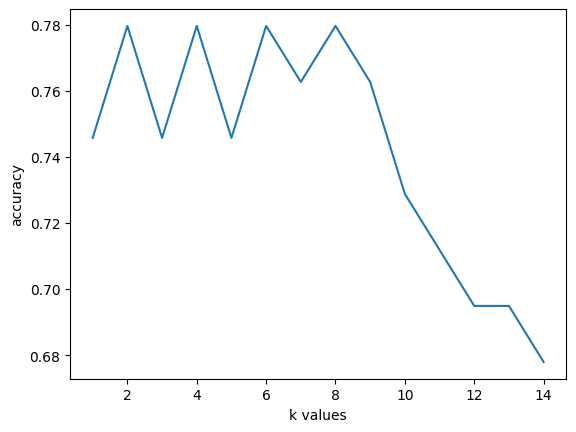

In [251]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
#visualize
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('plot')
plt.show()

In [252]:
knn = KNeighborsClassifier(n_neighbors=8) #We build our model
knn.fit(X_train,y_train) #We train our model
knn_acc_score=knn.score(X_test,y_test)*100
knn_acc_score

77.96610169491525

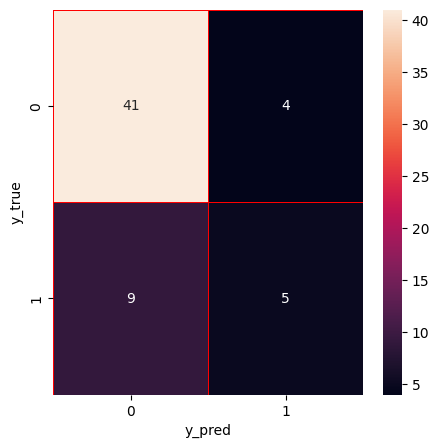

In [253]:
cm=confusion_matrix(y_test, knn.predict(X_test))
#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [254]:
from sklearn.metrics import classification_report
report = classification_report(y_test,knn.predict(X_test) )
print(report)


              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.56      0.36      0.43        14

    accuracy                           0.78        59
   macro avg       0.69      0.63      0.65        59
weighted avg       0.76      0.78      0.76        59



LOGISTIC REGRESSION

In [255]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear' ,multi_class='ovr')
lr.fit(X_train,y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [256]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, accuracy_score

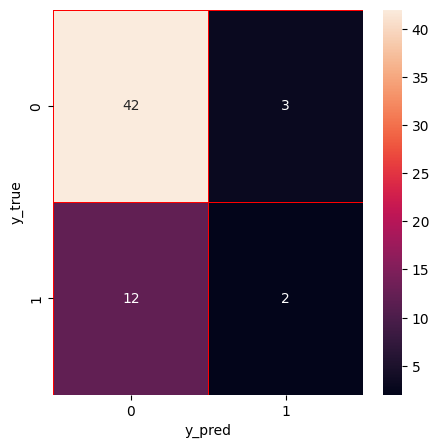

In [257]:
y_pred = lr.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [258]:
lr_acc_score=round(accuracy_score(y_test, lr.predict(X_test))*100,2)
lr_acc_score

74.58

In [259]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.78      0.93      0.85        45
           1       0.40      0.14      0.21        14

    accuracy                           0.75        59
   macro avg       0.59      0.54      0.53        59
weighted avg       0.69      0.75      0.70        59



In [260]:
!pip install xgboost


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [261]:
from xgboost import XGBClassifier

In [262]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [263]:
# make predictions for test data
y_pred = model.predict(X_test)

In [264]:
# evaluate predictions
xg_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (xg_accuracy * 100.0))

Accuracy: 81.36%


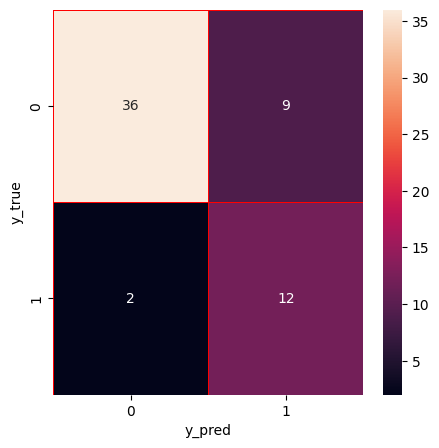

In [265]:
y_pred = model.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [266]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.57      0.86      0.69        14

    accuracy                           0.81        59
   macro avg       0.76      0.83      0.78        59
weighted avg       0.86      0.81      0.82        59



In [267]:
X_test

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
355,19,1.4,0.8,178,13,26,8.0,4.6,1.300000,1
407,12,1.0,0.2,719,157,108,7.2,3.7,1.000000,1
90,60,5.7,2.8,214,412,850,7.3,3.2,0.780000,1
402,42,0.5,0.1,162,155,108,8.1,4.0,0.900000,0
268,40,14.5,6.4,358,50,75,5.7,2.1,0.500000,1
356,33,0.7,0.2,256,21,30,8.5,3.9,0.800000,1
110,24,0.7,0.2,188,11,10,5.5,2.3,0.710000,0
488,60,0.7,0.2,171,31,26,7.0,3.5,1.000000,1
132,18,0.8,0.2,199,34,31,6.5,3.5,1.160000,0
497,67,2.2,1.1,198,42,39,7.2,3.0,0.700000,1


In [268]:
y_test

355    1
407    0
90     0
402    0
268    0
356    0
110    1
488    1
132    1
497    0
541    1
70     0
281    1
184    0
420    0
412    0
296    0
104    0
571    0
181    0
278    0
208    0
2      0
554    0
338    0
63     0
55     0
578    1
350    0
29     1
155    0
422    0
83     0
247    0
82     1
318    0
261    0
244    0
451    0
546    0
361    1
209    0
176    0
10     0
424    0
211    0
6      0
486    0
495    1
259    0
101    1
165    0
72     0
177    0
196    0
227    0
545    1
440    0
489    1
Name: Dataset, dtype: int64

In [269]:
model.predict(pd.DataFrame([[65,0.8,0.1,146,17,29,5.9,3.2,1.180000,1]], columns=['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Gender_Male']))

array([1])

In [270]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Random Forest','XGBClassifier'], 
                         'Accuracy': [lr_acc_score,knn_acc_score,rf_acc_score,xg_accuracy*100]})
model_ev.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy
2,Random Forest,81.360000
3,XGBClassifier,81.355932
1,K-Nearest Neighbour,77.966102
0,Logistic Regression,74.580000


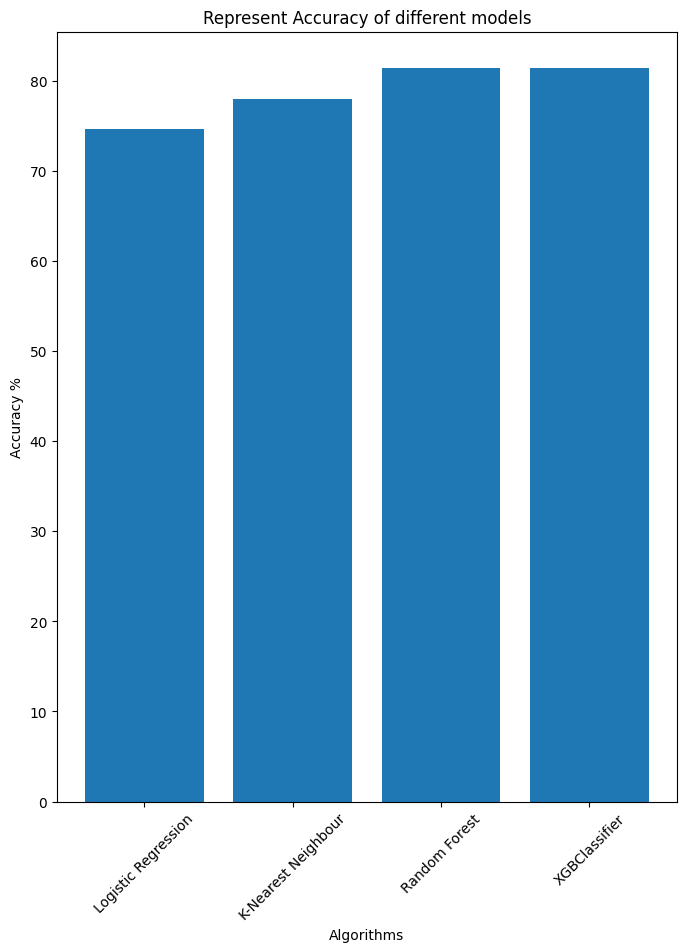

In [271]:
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(model_ev['Model'],model_ev['Accuracy'])
plt.show()

In [272]:
import pickle
pickle.dump(model, open('liver.pkl', 'wb'))